In [202]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [203]:
wholesale_customers = pd.read_csv('wholesale+customers\wholesale_customers.csv')

In [204]:
wholesale_customers.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [205]:
wholesale_customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Channel           440 non-null    int64
 1   Region            440 non-null    int64
 2   Fresh             440 non-null    int64
 3   Milk              440 non-null    int64
 4   Grocery           440 non-null    int64
 5   Frozen            440 non-null    int64
 6   Detergents_Paper  440 non-null    int64
 7   Delicassen        440 non-null    int64
dtypes: int64(8)
memory usage: 27.6 KB


In [206]:
wholesale_customers.describe()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,1.322727,2.543182,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,0.468052,0.774272,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,1.000000,1.000000,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,1.000000,2.000000,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,1.000000,3.000000,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,2.000000,3.000000,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,2.000000,3.000000,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


In [207]:
wholesale_customers.isnull().sum()

Channel             0
Region              0
Fresh               0
Milk                0
Grocery             0
Frozen              0
Detergents_Paper    0
Delicassen          0
dtype: int64

### KMeanClustering: No Data Preprocessing finding out the number of clusters through the elbow plot

In [208]:
#With no data preprocessing setting up the parameters
from pycaret.clustering import *
HClustParams = setup(wholesale_customers)

## Building KMean Clustering Model

In [209]:
#buildiing KMean clustering model
HClustModel = create_model('hclust')

,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.3483,185.2559,0.9701,0,0,0


In [210]:
plot_types = ['cluster', 'tsne', 'elbow']

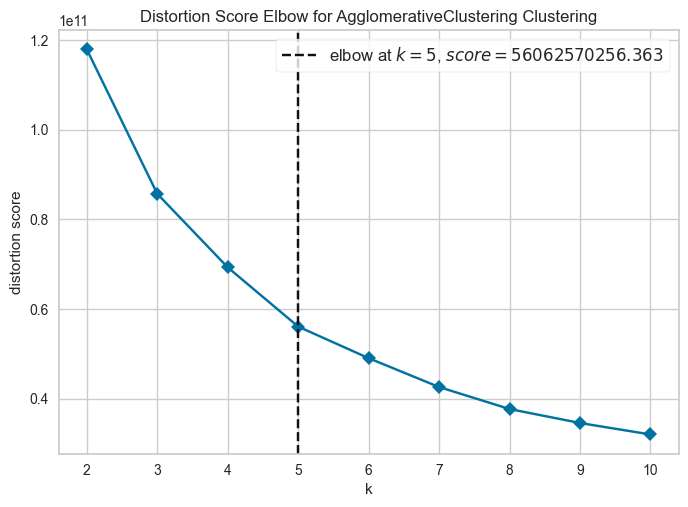

In [211]:
for pt in plot_types: 
    plot_model(HClustModel, plot = pt)

In [212]:
#get number of clusters from the elbow plot 
num_clusters = [4, 5, 6]

In [213]:
import pandas as pd
from pycaret.clustering import create_model

NDP = pd.DataFrame()  # NDP is no data preprocessing
for n in num_clusters:
    KMeanClusteringModel = create_model('hclust', num_clusters=n)
    evaluation_results = pull()
    evaluation_results_df = pd.DataFrame(evaluation_results)
    # Add 'num_clusters' column filled with value n
    evaluation_results_df['num_clusters'] = n
    # Concatenate evaluation results DataFrame with NDP
    NDP = pd.concat([evaluation_results_df, NDP], axis=0, ignore_index=True)

# Now NDP contains all the evaluation results for each number of clusters with 'num_clusters' column indicating the corresponding number of clusters


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.3483,185.2559,0.9701,0,0,0


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.3522,196.9540,0.9106,0,0,0


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.3136,192.2501,1.0070,0,0,0


In [214]:
#order by number of clusters 
NDP.sort_values(by='num_clusters', ascending=True, inplace=True)

In [215]:
NDP

,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness,num_clusters
2,0.3483,185.2559,0.9701,0,0,0,4
1,0.3522,196.9540,0.9106,0,0,0,5
0,0.3136,192.2501,1.0070,0,0,0,6


### Using Normalization (z-score)

In [216]:
#Using Normalization on data
setup(data = wholesale_customers, normalize = True, normalize_method = 'zscore', verbose = False)

In [217]:
x = create_model('hclust')

,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.3623,120.7561,0.8255,0,0,0


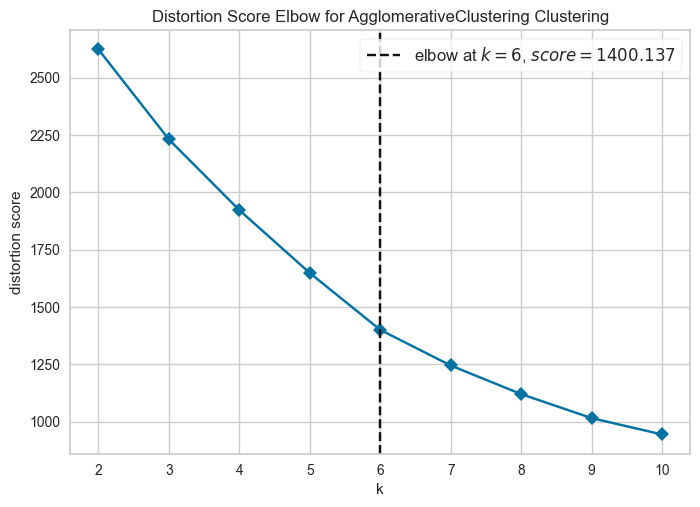

In [218]:
plot_model(x, plot = 'elbow')

In [219]:
num_clusters = [5, 6, 7]

In [220]:
Normalized = pd.DataFrame()  # Used ZScore on data
for n in num_clusters: 
    x = create_model('hclust', num_clusters=n)
    evaluation_results = pull()
    evaluation_results_df = pd.DataFrame(evaluation_results)
    evaluation_results_df['num_clusters'] = n
    Normalized = pd.concat([evaluation_results_df, Normalized], axis=0, ignore_index=True)

,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.3178,123.5061,0.8960,0,0,0


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.3438,131.4186,0.9554,0,0,0


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.3493,131.9171,1.0572,0,0,0


In [221]:
#sort by number of clusters
Normalized.sort_values(by='num_clusters', ascending=True, inplace=True)

In [222]:
Normalized

,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness,num_clusters
2,0.3178,123.5061,0.8960,0,0,0,5
1,0.3438,131.4186,0.9554,0,0,0,6
0,0.3493,131.9171,1.0572,0,0,0,7


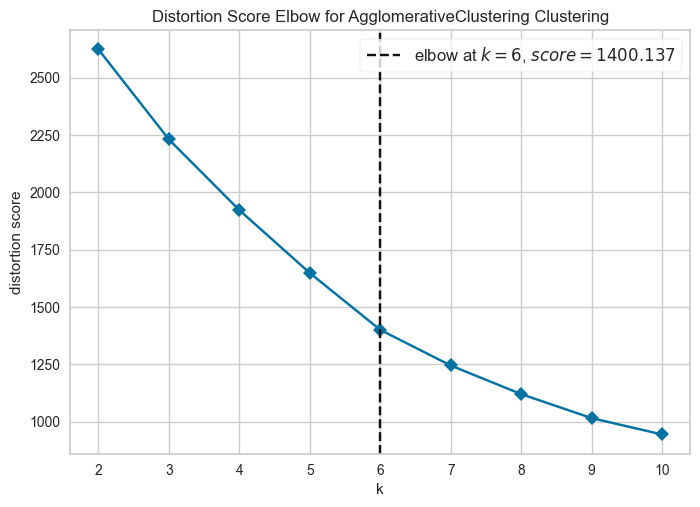

In [223]:
for pt in plot_types: 
    plot_model(x, plot = pt)

## Using transform on the data

In [224]:
#Using transform on the data yeo-johnson
setup(data = wholesale_customers, transformation = True, transformation_method = 'yeo-johnson', verbose = False)

In [225]:
x = create_model('hclust')

,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.5109,14291.9752,0.6054,0,0,0


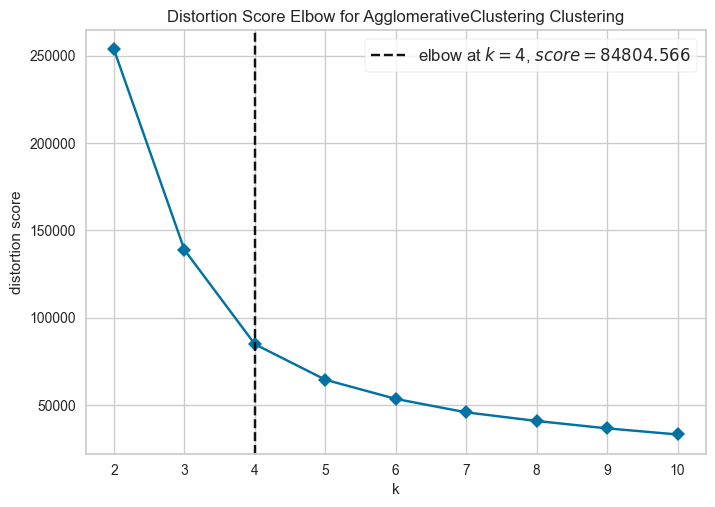

In [226]:
plot_model(x, plot = 'elbow')

In [227]:
num_clusters = [3,4,5]

In [228]:
Transformed = pd.DataFrame()  # Used Yeo-Johnson transformation
for n in num_clusters: 
    x = create_model('hclust', num_clusters=n)
    evaluation_results = pull()
    evaluation_results_df = pd.DataFrame(evaluation_results)
    evaluation_results_df['num_clusters'] = n
    Transformed = pd.concat([evaluation_results_df, Transformed], axis=0, ignore_index=True)

,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.8554,13039.7784,0.3389,0,0,0


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.5109,14291.9752,0.6054,0,0,0


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.4530,14101.6607,0.7125,0,0,0


In [229]:
Transformed.sort_values(by='num_clusters', ascending=True, inplace=True)

In [230]:
Transformed

,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness,num_clusters
2,0.8554,13039.7784,0.3389,0,0,0,3
1,0.5109,14291.9752,0.6054,0,0,0,4
0,0.4530,14101.6607,0.7125,0,0,0,5


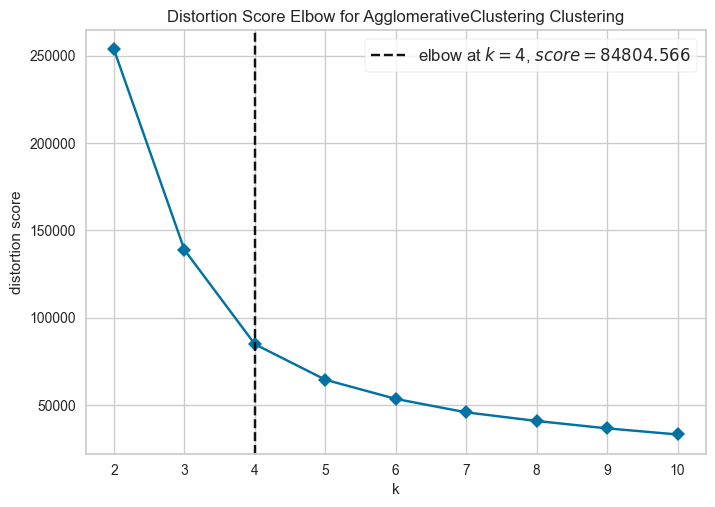

In [231]:
for pt in plot_types: 
    plot_model(x, plot = pt)   

### Using PCA

In [232]:
#Using PCA on the data
setup(data = wholesale_customers, pca = True, pca_method = 'linear', verbose = False)

In [233]:
x = create_model('hclust')

,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.3483,185.2559,0.9701,0,0,0


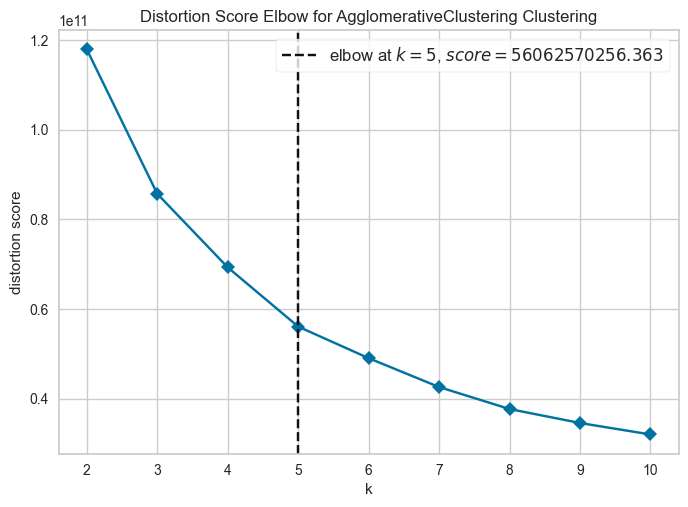

In [234]:
plot_model(x, plot = 'elbow')

In [235]:
num_clusters = [4,5,6]

In [236]:
PCA = pd.DataFrame()  # Used PCA
for n in num_clusters: 
    x = create_model('hclust', num_clusters=n)
    evaluation_results = pull()
    evaluation_results_df = pd.DataFrame(evaluation_results)
    evaluation_results_df['num_clusters'] = n
    PCA = pd.concat([evaluation_results_df, PCA], axis=0, ignore_index=True)

,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.3483,185.2559,0.9701,0,0,0


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.3522,196.9540,0.9106,0,0,0


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.3136,192.2501,1.0070,0,0,0


In [237]:
PCA.sort_values(by='num_clusters', ascending=True, inplace=True)

In [238]:
PCA

,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness,num_clusters
2,0.3483,185.2559,0.9701,0,0,0,4
1,0.3522,196.9540,0.9106,0,0,0,5
0,0.3136,192.2501,1.0070,0,0,0,6


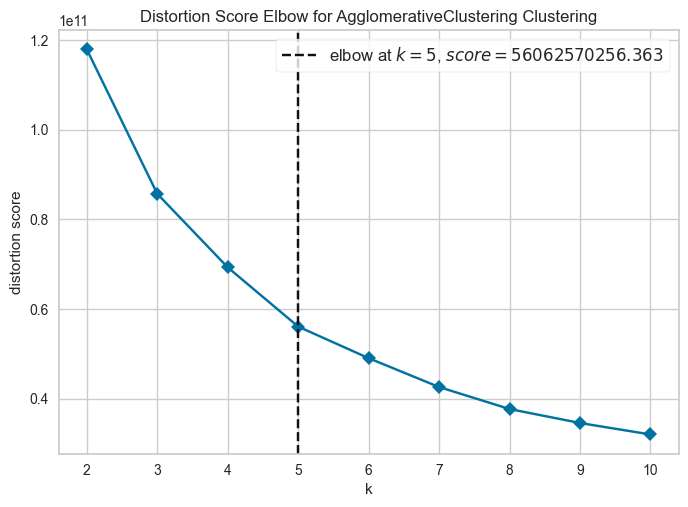

In [239]:
for pt in plot_types: 
    plot_model(x, plot = pt)

### Using Transformation and Normalized

In [240]:
#Using Transformation and Normalization on the data
setup(data = wholesale_customers, normalize = True, normalize_method = 'zscore', transformation = True, transformation_method = 'yeo-johnson', verbose = False)

In [241]:
x = create_model('hclust')

,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.2425,127.8460,1.4576,0,0,0


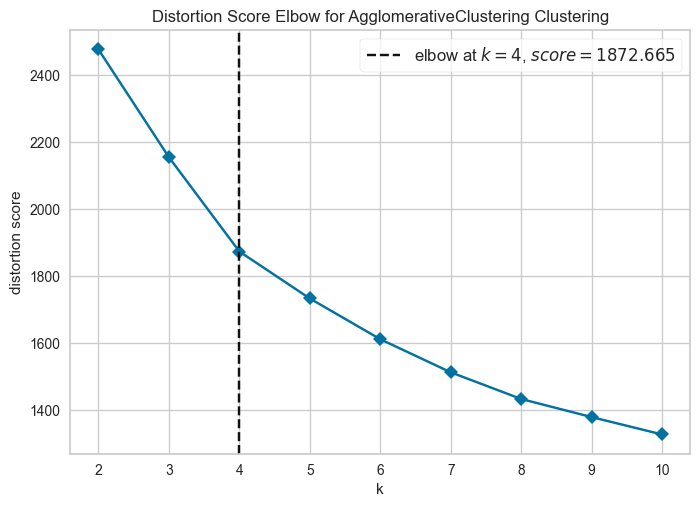

In [242]:
plot_model(x, plot = 'elbow')

In [243]:
num_clusters = [4,5,6]

In [244]:
Transformed_Normalized = pd.DataFrame()  # Used Yeo-Johnson transformation and ZScore normalization
for n in num_clusters: 
    x = create_model('hclust', num_clusters=n)
    evaluation_results = pull()
    evaluation_results_df = pd.DataFrame(evaluation_results)
    evaluation_results_df['num_clusters'] = n
    Transformed_Normalized = pd.concat([evaluation_results_df, Transformed_Normalized], axis=0, ignore_index=True)

,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.2425,127.8460,1.4576,0,0,0


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.2073,112.2108,1.4930,0,0,0


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.1847,102.8719,1.6614,0,0,0


In [245]:
Transformed_Normalized.sort_values(by='num_clusters', ascending=True, inplace=True)

In [246]:
Transformed_Normalized

,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness,num_clusters
2,0.2425,127.8460,1.4576,0,0,0,4
1,0.2073,112.2108,1.4930,0,0,0,5
0,0.1847,102.8719,1.6614,0,0,0,6


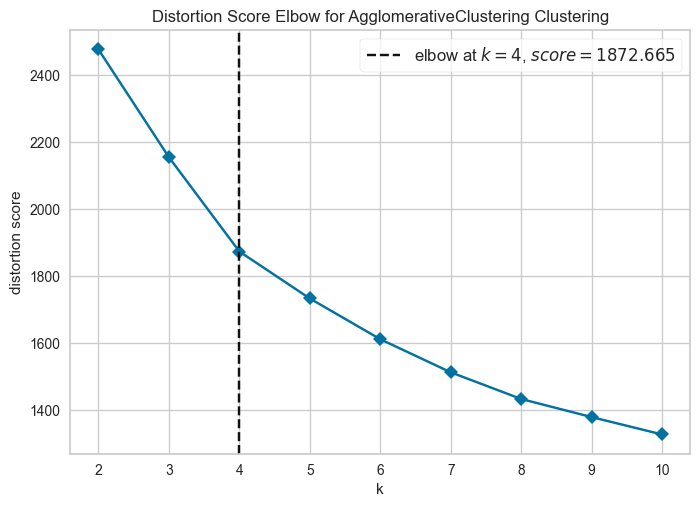

In [247]:
for pt in plot_types: 
    plot_model(x, plot = pt)

### Using Transformation Normalization and PCA

In [248]:
#Using PCA, Transformation and Normalization on the data
setup(data = wholesale_customers, pca = True, pca_method = 'linear', normalize = True, normalize_method = 'zscore', transformation = True, transformation_method = 'yeo-johnson', verbose = False)

In [249]:
x = create_model('hclust')

,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.2425,127.8460,1.4576,0,0,0


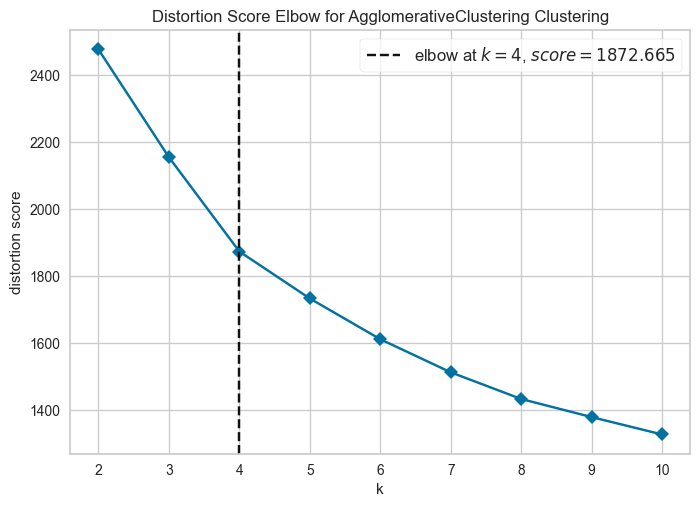

In [250]:
plot_model(x, plot = 'elbow')

In [251]:
num_clusters = [4,5,6]

In [252]:
Transformed_PCA_Normalized = pd.DataFrame()  # Used PCA, Yeo-Johnson transformation and ZScore normalization
for n in num_clusters: 
    x = create_model('hclust', num_clusters=n)
    evaluation_results = pull()
    evaluation_results_df = pd.DataFrame(evaluation_results)
    evaluation_results_df['num_clusters'] = n
    Transformed_PCA_Normalized = pd.concat([evaluation_results_df, Transformed_PCA_Normalized], axis=0, ignore_index=True)

,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.2425,127.8460,1.4576,0,0,0


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.2073,112.2108,1.4930,0,0,0


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.1847,102.8719,1.6614,0,0,0


In [253]:
Transformed_PCA_Normalized.sort_values(by='num_clusters', ascending=True, inplace=True)

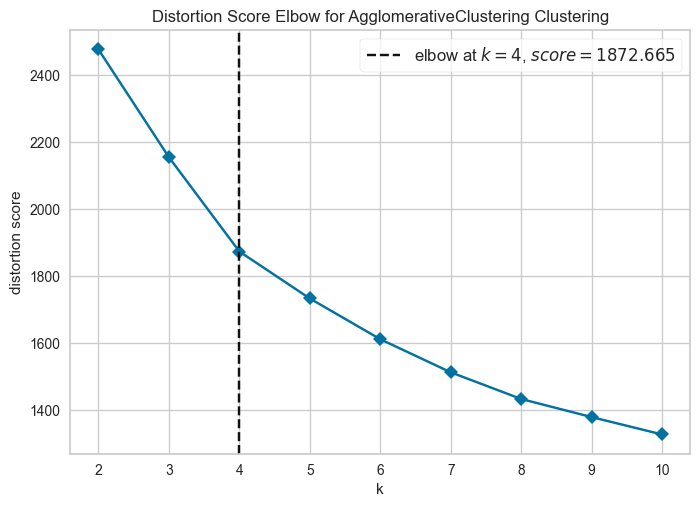

In [254]:
for pt in plot_types:
    plot_model(x, plot = pt)

### Merging and creating a results table

In [255]:
NDP

,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness,num_clusters
2,0.3483,185.2559,0.9701,0,0,0,4
1,0.3522,196.9540,0.9106,0,0,0,5
0,0.3136,192.2501,1.0070,0,0,0,6


In [256]:
Normalized

,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness,num_clusters
2,0.3178,123.5061,0.8960,0,0,0,5
1,0.3438,131.4186,0.9554,0,0,0,6
0,0.3493,131.9171,1.0572,0,0,0,7


In [257]:
Transformed

,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness,num_clusters
2,0.8554,13039.7784,0.3389,0,0,0,3
1,0.5109,14291.9752,0.6054,0,0,0,4
0,0.4530,14101.6607,0.7125,0,0,0,5


In [258]:
PCA

,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness,num_clusters
2,0.3483,185.2559,0.9701,0,0,0,4
1,0.3522,196.9540,0.9106,0,0,0,5
0,0.3136,192.2501,1.0070,0,0,0,6


In [259]:
Transformed_Normalized

,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness,num_clusters
2,0.2425,127.8460,1.4576,0,0,0,4
1,0.2073,112.2108,1.4930,0,0,0,5
0,0.1847,102.8719,1.6614,0,0,0,6


In [260]:
Transformed_PCA_Normalized

,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness,num_clusters
2,0.2425,127.8460,1.4576,0,0,0,4
1,0.2073,112.2108,1.4930,0,0,0,5
0,0.1847,102.8719,1.6614,0,0,0,6


In [261]:
columns_require_ground_truth = ['Homogeneity', 'Rand Index', 'Completeness']

In [262]:
Results = [
    NDP, 
    Normalized,
    Transformed,
    PCA,
    Transformed_Normalized,
    Transformed_PCA_Normalized
]

In [263]:
for result in Results: 
    result.drop(columns = columns_require_ground_truth, inplace = True)

In [264]:
NDP_Transpose = NDP.T

In [265]:
#name the columns as the number of clusters
NDP_Transpose.columns = ['c = 4', 'c = 5', 'c = 6']

In [266]:
NDP_Transpose
#Delete the num_clusters row
NDP_Transpose = NDP_Transpose.drop('num_clusters', axis = 0)

In [267]:
NDP_Transpose

,c = 4,c = 5,c = 6
Silhouette,0.3483,0.3522,0.3136
Calinski-Harabasz,185.2559,196.9540,192.2501
Davies-Bouldin,0.9701,0.9106,1.0070


In [268]:
Normalized.T

,2,1,0
Silhouette,0.3178,0.3438,0.3493
Calinski-Harabasz,123.5061,131.4186,131.9171
Davies-Bouldin,0.8960,0.9554,1.0572
num_clusters,5.0000,6.0000,7.0000


In [269]:
Normalized_Transpose = Normalized.T
Normalized_Transpose.columns = ['c = 5', 'c = 6', 'c = 7']
Normalized_Transpose.drop('num_clusters', axis = 0, inplace = True)

In [270]:
Transformed.T

,2,1,0
Silhouette,0.8554,0.5109,0.4530
Calinski-Harabasz,13039.7784,14291.9752,14101.6607
Davies-Bouldin,0.3389,0.6054,0.7125
num_clusters,3.0000,4.0000,5.0000


In [271]:
Transformed_Transpose = Transformed.T
Transformed_Transpose.columns = ['c = 3', 'c = 4', 'c = 5']
Transformed_Transpose.drop('num_clusters', axis = 0, inplace = True)

In [272]:
PCA.T

,2,1,0
Silhouette,0.3483,0.3522,0.3136
Calinski-Harabasz,185.2559,196.9540,192.2501
Davies-Bouldin,0.9701,0.9106,1.0070
num_clusters,4.0000,5.0000,6.0000


In [273]:
PCA_Transpose = PCA.T
PCA_Transpose.columns = ['c = 4', 'c = 5', 'c = 6']
PCA_Transpose.drop('num_clusters', axis = 0, inplace = True)

In [274]:
Transformed_Normalized.T

,2,1,0
Silhouette,0.2425,0.2073,0.1847
Calinski-Harabasz,127.8460,112.2108,102.8719
Davies-Bouldin,1.4576,1.4930,1.6614
num_clusters,4.0000,5.0000,6.0000


In [275]:
Transformed_Normalized_Transpose = Transformed_Normalized.T
Transformed_Normalized_Transpose.columns = ['c = 4', 'c = 5', 'c = 6']
Transformed_Normalized_Transpose.drop('num_clusters', axis = 0, inplace = True)

In [276]:
Transformed_PCA_Normalized.T

,2,1,0
Silhouette,0.2425,0.2073,0.1847
Calinski-Harabasz,127.8460,112.2108,102.8719
Davies-Bouldin,1.4576,1.4930,1.6614
num_clusters,4.0000,5.0000,6.0000


In [277]:
Transformed_PCA_Normalized_Transpose = Transformed_PCA_Normalized.T
Transformed_PCA_Normalized_Transpose.columns = ['c = 4', 'c = 5', 'c = 6']
Transformed_PCA_Normalized_Transpose.drop('num_clusters', axis = 0, inplace = True)

In [278]:
def create_multiindex_columns(df, columns, groups):
    df.columns = pd.MultiIndex.from_arrays([columns, groups])
    return df

In [279]:
NDP_Transpose

,c = 4,c = 5,c = 6
Silhouette,0.3483,0.3522,0.3136
Calinski-Harabasz,185.2559,196.9540,192.2501
Davies-Bouldin,0.9701,0.9106,1.0070


In [280]:
NDP_Transpose = create_multiindex_columns(NDP_Transpose, ['c = 4', 'c = 5', 'c = 6'], ['NDP', 'NDP', 'NDP'])

In [281]:
Normalized_Transpose

,c = 5,c = 6,c = 7
Silhouette,0.3178,0.3438,0.3493
Calinski-Harabasz,123.5061,131.4186,131.9171
Davies-Bouldin,0.8960,0.9554,1.0572


In [282]:
Normalized_Transpose = create_multiindex_columns(Normalized_Transpose, ['c = 5', 'c = 6', 'c = 7'], ['Normalized', 'Normalized', 'Normalized'])

In [283]:
Transformed_Transpose  

,c = 3,c = 4,c = 5
Silhouette,0.8554,0.5109,0.4530
Calinski-Harabasz,13039.7784,14291.9752,14101.6607
Davies-Bouldin,0.3389,0.6054,0.7125


In [284]:
Transformed_Transpose = create_multiindex_columns(Transformed_Transpose, ['c = 3', 'c = 4', 'c = 5'], ['Transformed', 'Transformed', 'Transformed'])

In [285]:
PCA_Transpose

,c = 4,c = 5,c = 6
Silhouette,0.3483,0.3522,0.3136
Calinski-Harabasz,185.2559,196.9540,192.2501
Davies-Bouldin,0.9701,0.9106,1.0070


In [286]:
PCA_Transpose = create_multiindex_columns(PCA_Transpose, ['c = 4', 'c = 5', 'c = 6'], ['PCA', 'PCA', 'PCA'])

In [287]:
PCA_Transpose

,c = 4,c = 5,c = 6
,PCA,PCA,PCA
Silhouette,0.3483,0.3522,0.3136
Calinski-Harabasz,185.2559,196.9540,192.2501
Davies-Bouldin,0.9701,0.9106,1.0070


In [288]:
Transformed_Normalized_Transpose

,c = 4,c = 5,c = 6
Silhouette,0.2425,0.2073,0.1847
Calinski-Harabasz,127.8460,112.2108,102.8719
Davies-Bouldin,1.4576,1.4930,1.6614


In [289]:
Transformed_Normalized_Transpose = create_multiindex_columns(Transformed_Normalized_Transpose, ['c = 4', 'c = 5', 'c = 6'], ['T+N', 'T+N', 'T+N'])

In [290]:
Transformed_PCA_Normalized_Transpose 

,c = 4,c = 5,c = 6
Silhouette,0.2425,0.2073,0.1847
Calinski-Harabasz,127.8460,112.2108,102.8719
Davies-Bouldin,1.4576,1.4930,1.6614


In [291]:
Transformed_PCA_Normalized_Transpose = create_multiindex_columns(Transformed_PCA_Normalized_Transpose, ['c = 4', 'c = 5', 'c = 6'], ['T+N+PCA', 'T+N+PCA', 'T+N+PCA'])

In [292]:
#Now concat all these dataframes into one
concatenated_results = pd.concat([NDP_Transpose, Normalized_Transpose, Transformed_Transpose, PCA_Transpose, Transformed_Normalized_Transpose, Transformed_PCA_Normalized_Transpose], axis = 1)

In [293]:
concatenated_results

,c = 4,c = 5,c = 6,c = 5,c = 6,c = 7,c = 3,c = 4,c = 5,c = 4,c = 5,c = 6,c = 4,c = 5,c = 6,c = 4,c = 5,c = 6
,NDP,NDP,NDP,Normalized,Normalized,Normalized,Transformed,Transformed,Transformed,PCA,PCA,PCA,T+N,T+N,T+N,T+N+PCA,T+N+PCA,T+N+PCA
Silhouette,0.3483,0.3522,0.3136,0.3178,0.3438,0.3493,0.8554,0.5109,0.4530,0.3483,0.3522,0.3136,0.2425,0.2073,0.1847,0.2425,0.2073,0.1847
Calinski-Harabasz,185.2559,196.9540,192.2501,123.5061,131.4186,131.9171,13039.7784,14291.9752,14101.6607,185.2559,196.9540,192.2501,127.8460,112.2108,102.8719,127.8460,112.2108,102.8719
Davies-Bouldin,0.9701,0.9106,1.0070,0.8960,0.9554,1.0572,0.3389,0.6054,0.7125,0.9701,0.9106,1.0070,1.4576,1.4930,1.6614,1.4576,1.4930,1.6614


In [294]:
from pretty_html_table import build_table
html_table_blue_light = build_table(concatenated_results, 'blue_light')

In [295]:
with open('HClustModelResults.html', 'w') as f:
    f.write(html_table_blue_light)